<a href="https://colab.research.google.com/github/WISSAL-MN/cancer-prediction/blob/main/Breast_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'https://github.com/WISSAL-MN'

'https://github.com/WISSAL-MN'

In [2]:
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv("BreastCancerData.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4    Marginal Adhesion           699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [8]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (699, 11)


In [9]:
df.isnull().sum()
#dataset.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
 Marginal Adhesion             0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [13]:
X=df.drop(columns='Class')
y=df['Class']


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,y_test)

0.9714285714285714

In [24]:
#Creating the confusion Matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


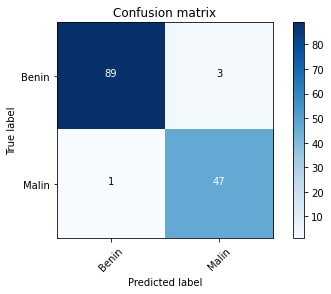

In [30]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Benin', 'Malin'])
#nihel la tu vois qu'il fonctionne bien il donne un score elever mais le tient est
# plus elever que le mienne donc la capture d'écran sera mis sur les résultat qu'on a obtenue hier 

In [31]:
import pickle

In [33]:
with open('classifier_pkl', 'wb') as files:
    pickle.dump(classifier, files)
#le résultat sera affiché dans ce fichier pickle    